#Import libraries


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Path


In [3]:
path="/content/drive/MyDrive/Project/test-Minimum-Error-Rate-Classifier.txt"

# Reading the data as dataframe

In [4]:
df = pd.read_csv(path, sep=',', header=None, names = ['x1', 'x2'], dtype='Float32')
df

,x1,x2
0,1.0,1.0
1,1.0,-1.0
2,4.0,5.0
3,-2.0,2.5
4,0.0,2.0
5,2.0,-3.0


#Setting the Parameters

In [5]:
prior_class1 = 0.5
prior_class2 = 0.5

meu1 = np.array([0.,0.])
meu2 = np.array([2.,2.])

sigma1 = np.array([[.25, .3],[.3, 1]])
sigma2 = np.array([[.5,0],[0,.5]])

#Feature

In [6]:
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
trans_x = np.array([x1,x2]).T
print(trans_x.dtype)
trans_x

object


array([[1.0, 1.0],
       [1.0, -1.0],
       [4.0, 5.0],
       [-2.0, 2.5],
       [0.0, 2.0],
       [2.0, -3.0]], dtype=object)

# Calculation of normal for each datapoint

In [7]:
def normal_distribution(x, sigma, meu):
  sigma_D = np. linalg. det(sigma)
  sigma_I = np.linalg.inv(sigma)
  D = 2
  denom = np.sqrt(((2.0*math.pi)**D)*sigma_D)
  result = np.empty(len(x))

  for ind,x in enumerate(x):
    exp = np.exp(-0.5 * np.dot((x-meu), np.dot(sigma_I,(x-meu).T)))
    result[ind] = exp/denom

  return result

In [8]:
normal_value1 = normal_distribution(trans_x,sigma1,meu1) * prior_class1
normal_value2 = normal_distribution(trans_x,sigma2,meu2) * prior_class2

normal_value1, normal_value2

(array([2.60957317e-02, 6.13712786e-04, 2.44194018e-15, 4.76386919e-13,
        8.74097521e-03, 8.52320872e-15]),
 array([2.15392793e-02, 7.22562324e-06, 3.59742598e-07, 1.39487343e-08,
        2.91502447e-03, 2.21033492e-12]))

# Classifying the datapoints

In [9]:
label = []
pdf = []

for norm_value1, norm_value2 in zip(normal_value1,normal_value2):
  if norm_value1 > norm_value2:
    label.append("Class 1")
    pdf.append(norm_value1)
  else:
    label.append("Class 2")
    pdf.append(norm_value2)

df['PDF'] = pdf
df['Class'] = label
df

,x1,x2,PDF,Class
0,1.0,1.0,2.609573e-02,Class 1
1,1.0,-1.0,6.137128e-04,Class 1
2,4.0,5.0,3.597426e-07,Class 2
3,-2.0,2.5,1.394873e-08,Class 2
4,0.0,2.0,8.740975e-03,Class 1
5,2.0,-3.0,2.210335e-12,Class 2


# Generating dummy datapoints

In [10]:
dummy_x1 = np.linspace(-6, 6, 500)
dummy_x2 = np.linspace(-6, 6, 500)
pdf = np.empty((500,500))
decision_boundary = np.zeros((500,500))
decision_boundary

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
for i in range(len(dummy_x1)):
  for j in range(len(dummy_x1)):

    normal1 = normal_distribution(np.array([[dummy_x1[i],dummy_x2[j]]]),sigma1,meu1)
    normal2 = normal_distribution(np.array([[dummy_x1[i],dummy_x2[j]]]),sigma2,meu2)

    pdf[i][j] = max(normal1, normal2)

    if abs((np.log10(normal1)-np.log10(normal2))- np.log10(prior_class1) + np.log10(prior_class2)) <= 0.1:
      decision_boundary[i][j] = 1
decision_boundary

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
class1_x1 = list(df[df['Class'] == 'Class 1']['x1'])
class1_x2 = list(df[df['Class'] == 'Class 1']['x2'])
pdf_class1 = list(df[df['Class'] == 'Class 1']['PDF'])

class2_x1 = list(df[df['Class'] == 'Class 2']['x1'])
class2_x2 = list(df[df['Class'] == 'Class 2']['x2'])
pdf_class2 = list(df[df['Class'] == 'Class 2']['PDF'])

# Decision boundary


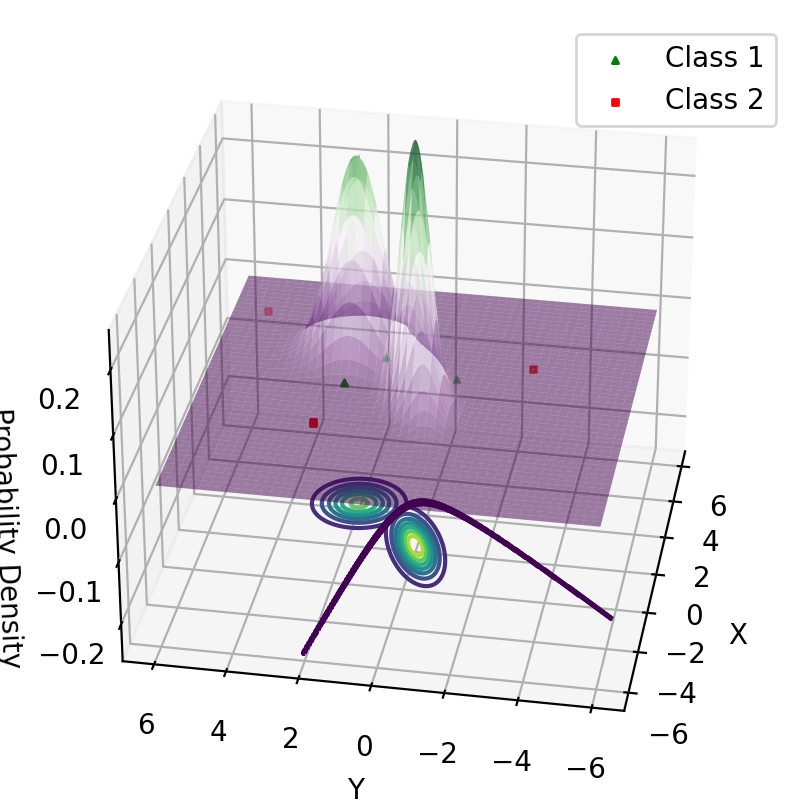

In [13]:
X, Y = np.meshgrid(dummy_x1,dummy_x2)

fig = plt.figure(figsize=(5, 5), dpi = 200)

ax = plt.axes(projection = '3d')
surf = ax.plot_surface(X,Y, pdf,cmap='PRGn',linewidth = 0,antialiased = True, alpha = 0.5)

ax.contour(X, Y, pdf, zdir='z',offset=-0.25)
ax.contour(X, Y, decision_boundary, zdir='z',offset=-0.25)
ax.scatter(class1_x1, class1_x2, pdf_class1, s = 5, facecolor="green",marker='^', label='Class 1')
ax.scatter(class2_x1, class2_x2, pdf_class2, s = 5, facecolor="red",marker='s',label='Class 2')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_zlim(-.25,.25)
ax.view_init(30,190)
ax.legend()
plt.show()